In [1]:
import pandas as pd
da_Advertising=pd.read_csv("Advertising.csv")
da_Advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


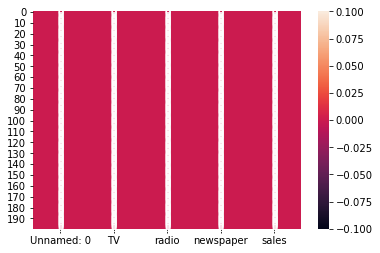

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(da_Advertising.isnull(),annot=True)
plt.show()

In [3]:
da_Advertising.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
from scipy.stats import zscore
z_score=abs(zscore(da_Advertising))
print(da_Advertising.shape)
da_Advertising_final=da_Advertising.loc[(z_score<3).all(axis=1)]
print(da_Advertising_final.shape)

(200, 5)
(198, 5)


In [10]:
da_Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
da_Advertising.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


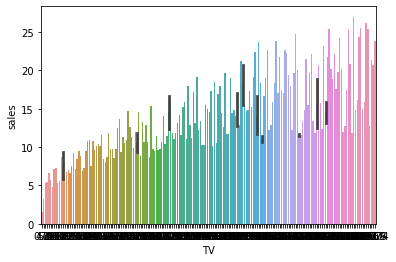

In [21]:
import seaborn as sns
sns.barplot(x=da_Advertising["TV"],y=da_Advertising["sales"])
plt.show()

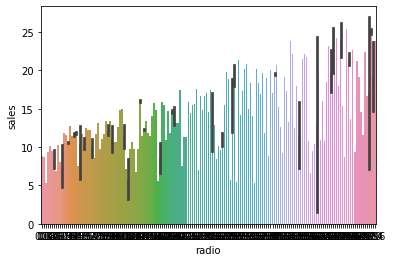

In [25]:
import seaborn as sns
sns.barplot(x=da_Advertising["radio"],y=da_Advertising["sales"])
plt.show()

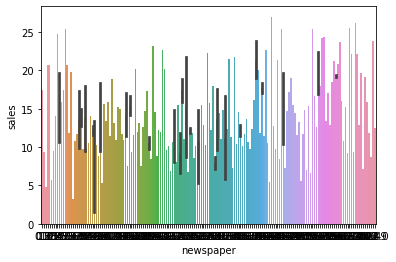

In [26]:
import seaborn as sns
sns.barplot(x=da_Advertising["newspaper"],y=da_Advertising["sales"])
plt.show()

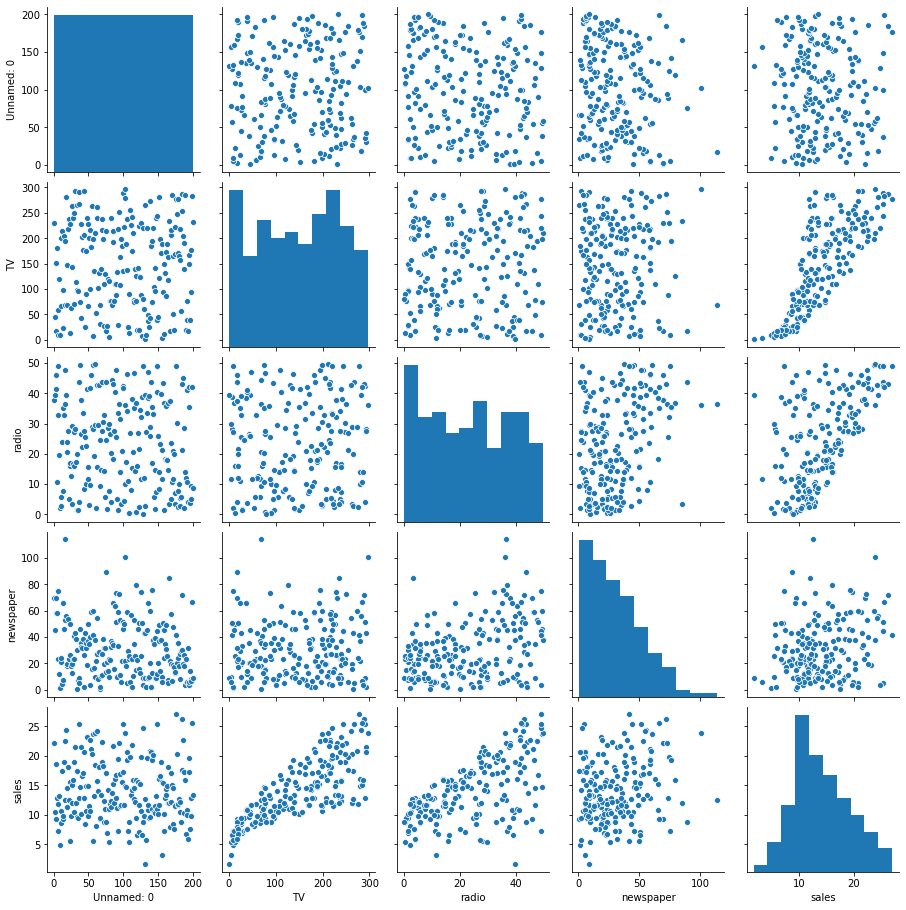

In [24]:
sns.pairplot(da_Advertising)
plt.show()

In [31]:
da_Advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [32]:
from scipy.stats import zscore
z_score=abs(zscore(da_Advertising))
print(da_Advertising.shape)
da_Advertising_final=da_Advertising.loc[(z_score<3).all(axis=1)]
print(da_Advertising_final.shape)

(200, 5)
(198, 5)


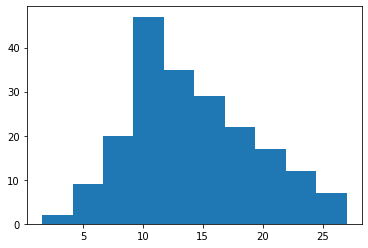

In [33]:
plt.hist(x="sales",bins=10,data=da_Advertising)
plt.show()

In [34]:
da_Advertising.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [36]:
import numpy as np
for col in da_Advertising.columns:
    if da_Advertising.skew().loc[col]>0.55:
        da_Advertising[col]=np.log1p(da_Advertising[col])

In [37]:
da_Advertising.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -0.799875
sales         0.407571
dtype: float64

In [38]:
import numpy as np
df_x=da_Advertising_final.drop(columns=["sales"])
y=da_Advertising_final[["sales"]]

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(df_x)
df_x

array([[-1.73103384e+00,  9.78697339e-01,  9.89521352e-01,
         1.93299778e+00],
       [-1.71370862e+00, -1.19901165e+00,  1.09070498e+00,
         7.51312752e-01],
       [-1.69638341e+00, -1.51933199e+00,  1.53591293e+00,
         1.93790103e+00],
       [-1.67905820e+00,  5.64563564e-02,  1.22561648e+00,
         1.40834924e+00],
       [-1.66173298e+00,  4.00243389e-01, -8.31783915e-01,
         1.40344598e+00],
       [-1.64440777e+00, -1.61906543e+00,  1.73828018e+00,
         2.21738670e+00],
       [-1.62708256e+00, -1.04647815e+00,  6.52242599e-01,
        -3.07790837e-01],
       [-1.60975734e+00, -3.10797368e-01, -2.38173309e-01,
        -8.91278462e-01],
       [-1.59243213e+00, -1.62023876e+00, -1.41864895e+00,
        -1.41102374e+00],
       [-1.57510692e+00,  6.23176960e-01, -1.38492107e+00,
        -4.20565756e-01],
       [-1.55778170e+00, -9.45571378e-01, -1.16906267e+00,
        -2.73468035e-01],
       [-1.54045649e+00,  7.98003813e-01,  5.86319933e-02,
      

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(25,101):
    df_x_train,df_x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(df_x_train,y_train)
    y_pred=regr.predict(df_x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is : ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
        

r2_score corresponding to random state:  25 is :  0.9372891755010233
r2_score corresponding to random state:  26 is :  0.8207864546737746
r2_score corresponding to random state:  27 is :  0.8222297326684505
r2_score corresponding to random state:  28 is :  0.8222027499695685
r2_score corresponding to random state:  29 is :  0.8430483256430259
r2_score corresponding to random state:  30 is :  0.8233390617780337
r2_score corresponding to random state:  31 is :  0.9277347313962332
r2_score corresponding to random state:  32 is :  0.9176250779401859
r2_score corresponding to random state:  33 is :  0.9133078040842642
r2_score corresponding to random state:  34 is :  0.881319145527224
r2_score corresponding to random state:  35 is :  0.9150068198831594
r2_score corresponding to random state:  36 is :  0.9079908577411977
r2_score corresponding to random state:  37 is :  0.9049454969983116
r2_score corresponding to random state:  38 is :  0.9173861952073469
r2_score corresponding to random st

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),df_x,y,cv=5,scoring="r2").mean()

0.8827160786305974

In [47]:
df_x_train,df_x_test,y_train,y_test=train_test_split(df_x,y,random_state=90,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(df_x_train,y_train)
y_pred=lr.predict(df_x_test)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE IS: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9476976386811369
RMSE IS:  1.2556824302885015


In [49]:
import joblib
joblib.dump(lr,"lr_Advertising.pkl")

['lr_Advertising.pkl']